# K-Means

1. Randomly pick k data points as initial Centroids.
2. Compute distance between each data point to each centroid.
3. Assign each data point to the closest centroid based on min distance.
4. New centroid location is avg of all those in current cluster.
5. Repeat the Steps 2 to 4 until centroids don’t change

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [2]:
x, y = fetch_california_housing(return_X_y=True)
x = x[:, 0].reshape(-1, 1)

In [3]:
def compute_distances(x, centroids):
    distances = []
    for mu in centroids:
        distances.append(np.linalg.norm(x - mu, axis=1))
        
    return np.stack(distances)


def assign_points(distances):
    return distances.argmin(axis=0)


def update_centroids(x, assignments, k):
    centroids = [x[assignments == cluster].mean(axis=0) for cluster in range(k)]
    return np.array(centroids)


def run_step(x, centroids, k):
    distances = compute_distances(x, centroids)
    assignments = assign_points(distances)
    
    centroids = update_centroids(x, assignments, k)
    return centroids

In [27]:
def compute_clusters(x, k: int, max_steps=1000, seed=42, stopping_criterea=1e-8):
    centroids = np.random.RandomState(0).choice(len(x), k)
    centroids = x[centroids]
    
    for i in range(max_steps):
        new_centroids = run_step(x, centroids, k)
        if np.allclose(centroids, new_centroids, atol=stopping_criterea):
            print(f"Reached stopping point, idx={i}")
            break

        centroids = new_centroids
        
    return assign_points(compute_distances(x, centroids)), centroids

In [28]:
clusters, centroids = compute_clusters(x, k=5)

Reached stopping point, idx=56


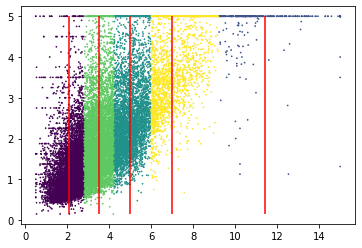

In [37]:
plt.scatter(x, y, c=clusters, s=0.5)
plt.vlines(centroids, ymin=y.min(), ymax=y.max(), colors='red')
plt.show()
plt.close()